# ARMA and ARIMA Models

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
from pmdarima import auto_arima

In [6]:
df1 = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/DailyTotalFemaleBirths.csv', parse_dates=True, index_col='Date')
df1.index.freq = 'D'
df1 = df1[:120]

In [7]:
df2 = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/TradeInventories.csv', parse_dates=True, index_col='Date')
df2.index.freq = 'MS'

# ARMA

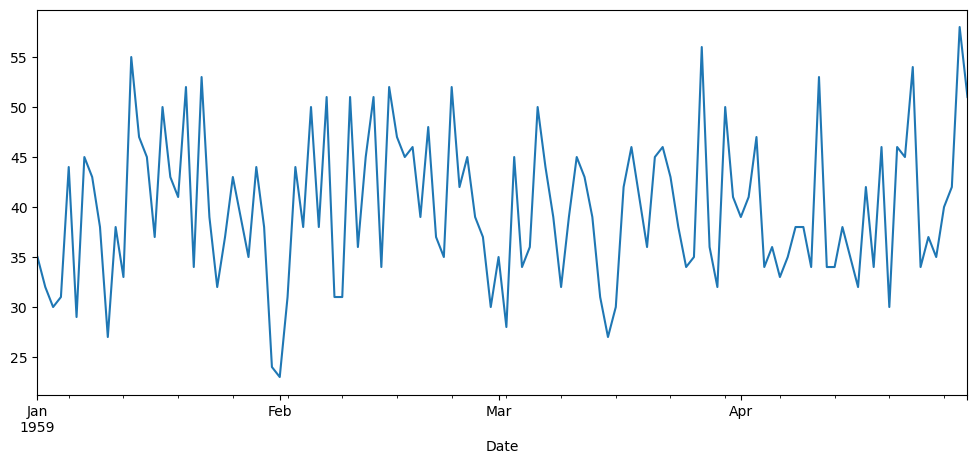

In [8]:
df1['Births'].plot(figsize=(12,5))
plt.show()

## Function for running the augmented Dickey-Fuller test

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [11]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 07 Dec 2025   AIC                            823.489
Time:                        10:22:08   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX model without a seasonal component (\(P=0,D=0,Q=0\)) and without exogenous variables (\(x\)) is equivalent to an ARMA model. The SARIMAX model includes seasonal parameters (\(P,D,Q\)) and a seasonal period (\(m\)) in addition to the standard non-seasonal parameters (\(p,d,q\)) and exogenous regressors (\(x\)). By setting the seasonal orders to zero and removing any exogenous variables, the model simplifies to its non-seasonal components, which are the core of the ARMA model. 

### Forecast 1 month into the future

In [12]:
# train test split
train = df1.iloc[:90]
test = df1.iloc[90:]

In [13]:
# create the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Births'], order=(2,0,2),
                seasonal_order=(0,0,0,0),
                enforce_stationarity=False,
                enforce_invertibility=False)

In [14]:
# fit the model
results = model.fit()

In [15]:
# see the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -300.040
Date:                Sun, 07 Dec 2025   AIC                            610.079
Time:                        10:22:08   BIC                            622.409
Sample:                    01-01-1959   HQIC                           615.044
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1815      0.142      1.277      0.202      -0.097       0.460
ar.L2          0.8189      0.142      5.761      0.000       0.540       1.098
ma.L1         -0.1227    431.338     -0.000      1.000    -845.530     845.284
ma.L2         -0.8773    378.400     -0.002      0.998    -742.528     740.774
sigma2        54.9021   2.37e+04      0.002      0.998   -4.64e+04    4.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.72   Prob(JB):                         0.54
Heteroskedasticity (H):               0.65   Skew:                             0.09
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# forecast off the model for futre predicted results
# set the start and end indexes for the forecast
start=len(train)
end=len(train)+len(test)-1 #without the -1 it will give an index out of bounds error

In [17]:
predictions = results.predict(start=start, end=end).rename('ARMA (2,2) Predictions')

In [18]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [19]:
predictions

1959-04-01    40.308693
1959-04-02    40.255026
1959-04-03    40.315774
1959-04-04    40.282849
1959-04-05    40.326622
1959-04-06    40.307602
1959-04-07    40.339998
1959-04-08    40.330301
1959-04-09    40.355071
1959-04-10    40.351625
1959-04-11    40.371286
1959-04-12    40.372031
1959-04-13    40.388267
1959-04-14    40.391825
1959-04-15    40.405766
1959-04-16    40.411210
1959-04-17    40.423615
1959-04-18    40.430324
1959-04-19    40.441701
1959-04-20    40.449259
1959-04-21    40.459948
1959-04-22    40.468078
1959-04-23    40.478307
1959-04-24    40.486821
1959-04-25    40.496743
1959-04-26    40.505516
1959-04-27    40.515234
1959-04-28    40.524182
1959-04-29    40.533764
1959-04-30    40.542831
Freq: D, Name: ARMA (2,2) Predictions, dtype: float64

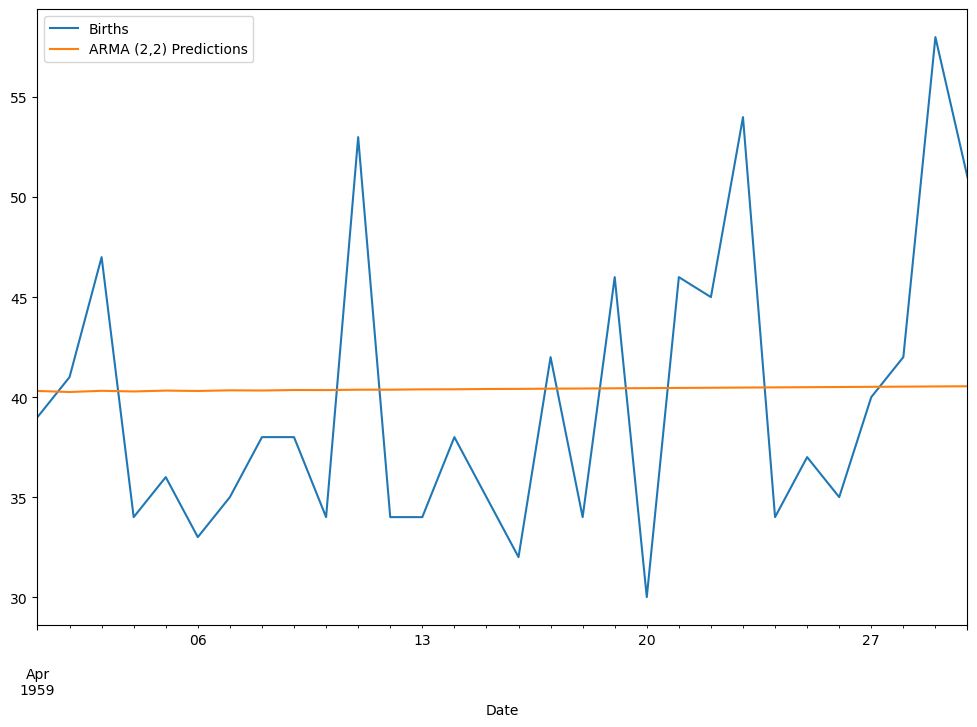

In [20]:
test['Births'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)
plt.show()

In [21]:
test.mean()

Births    39.833333
dtype: float64

In [22]:
predictions.mean()

np.float64(40.40900896407168)

# ARIMA

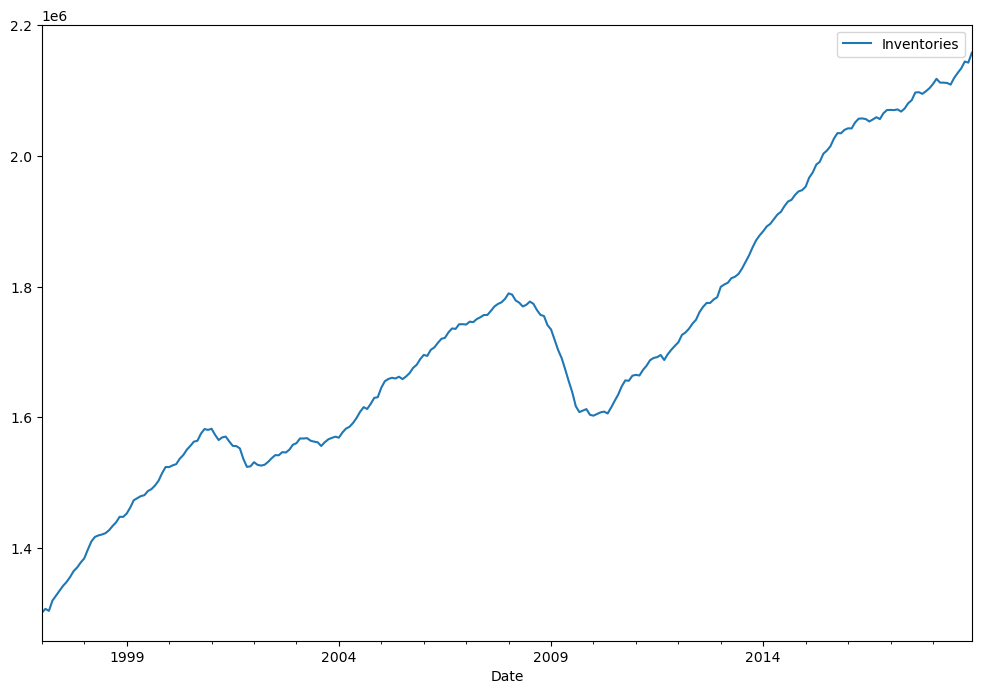

In [23]:
df2.plot(figsize=(12,8))
plt.show()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

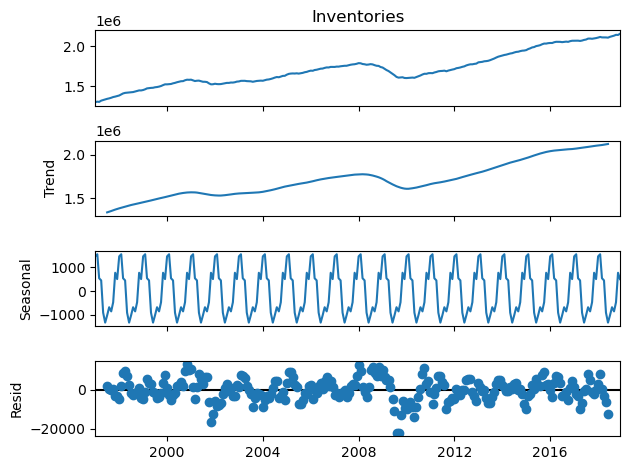

In [25]:
results = seasonal_decompose(df2['Inventories'], model='additive')
results.plot()
plt.show()

In [26]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 07 Dec 2025   AIC                           5348.037
Time:                        10:22:11   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Deriving the order values from ACF and PACF Plots (Optinoa)

In [27]:
# for d = 1
from statsmodels.tsa.statespace.tools import diff


In [28]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [29]:
# run the adf test function
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Dickey-Fuller Test confirms that differencing by 1, the data is stationary

### Run ACF and PACF plots to get the p and q components

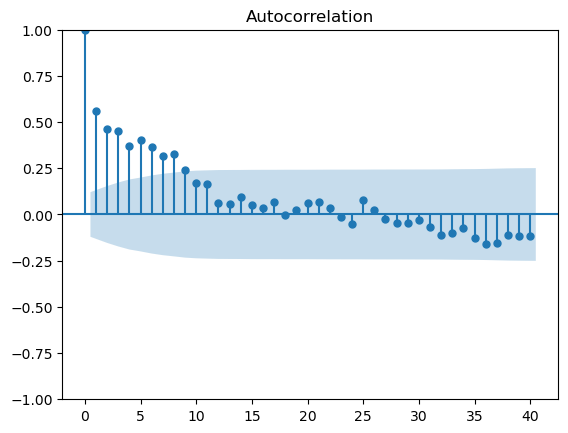

In [30]:
# plor ACF
plot_acf(df2['Diff_1'].dropna(), lags=40)
plt.show()

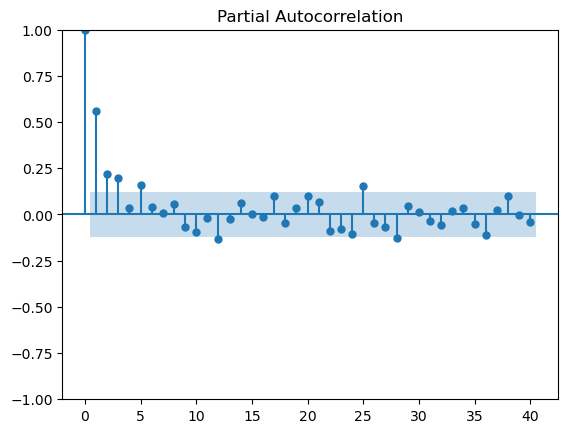

In [31]:
# plot PACF
plot_pacf(df2['Diff_1'].dropna(), lags=40)
plt.show()

#### Picking AR

Need to frcus more on the AR or the MA components. How to decide that using the plots <br>
Rule 6 - If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive -- i.e., if hte sereis appears slightly "underdiffrenced"--then consider adding an AR term to the model. The lag at which the PACF cuts offis the indicated number of AR terms.


In this case, the sharp cut-off occurs at lag = 0 - therefore, AR = 0. But looking at the graph, this is not conclusive

#### Picking MA

AR and MA signatures: If the PACF display a sharp cutoff while the ACF decays more slowly (i.e., has signigicant spikes at highre lags), we say taht the stationarized sereis displays an "AR signature," meaning that hte autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. 

By lookin at the graphs:
* AR = 0 or 1
* I = 1
* MA = 0 or 1 - try both of these to see which has less error

In [32]:
# stepwise fit with trace using start and max p and q values
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=1,
                          seasonal=False,
                          trace=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.210 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 07 Dec 2025   AIC                           5348.037
Time:                        10:22:11   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NOTE: **ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.03 sec** - gives the lowest AIC

## Train-Test Split

In [33]:
len(df2)

264

In [34]:
train = df2.iloc[:252]
test = df2.iloc[252:]


In [35]:
# fit the model on inventories data
model = SARIMAX(train['Inventories'], order=(1,1,1))
# fit the model
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2550.594
Date:                Sun, 07 Dec 2025   AIC                           5107.188
Time:                        10:22:11   BIC                           5117.764
Sample:                    01-01-1997   HQIC                          5111.444
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    589.762      0.000       0.997       1.003
ma.L1         -0.9999      0.042    -23.671      0.000      -1.083      -0.917
sigma2      3.714e+07   2.44e-10   1.52e+17      0.000    3.71e+07    3.71e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               100.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -1.18
Prob(H) (two-sided):                  0.25   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.49e+32. Standard errors may be unstable.
"""

## Predicting Future

In [36]:
# predict from start length of train to length of train + length of test -1
start=len(train)
end=len(train)+len(test)-1

predcitions = results.predict(start=start, end=end, typ='levels').rename("ARIMA(1,1,1) Predictions") # the default type returns the difference predictions but we want the real forecasts

In [37]:
predictions

1959-04-01    40.308693
1959-04-02    40.255026
1959-04-03    40.315774
1959-04-04    40.282849
1959-04-05    40.326622
1959-04-06    40.307602
1959-04-07    40.339998
1959-04-08    40.330301
1959-04-09    40.355071
1959-04-10    40.351625
1959-04-11    40.371286
1959-04-12    40.372031
1959-04-13    40.388267
1959-04-14    40.391825
1959-04-15    40.405766
1959-04-16    40.411210
1959-04-17    40.423615
1959-04-18    40.430324
1959-04-19    40.441701
1959-04-20    40.449259
1959-04-21    40.459948
1959-04-22    40.468078
1959-04-23    40.478307
1959-04-24    40.486821
1959-04-25    40.496743
1959-04-26    40.505516
1959-04-27    40.515234
1959-04-28    40.524182
1959-04-29    40.533764
1959-04-30    40.542831
Freq: D, Name: ARMA (2,2) Predictions, dtype: float64

In [38]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


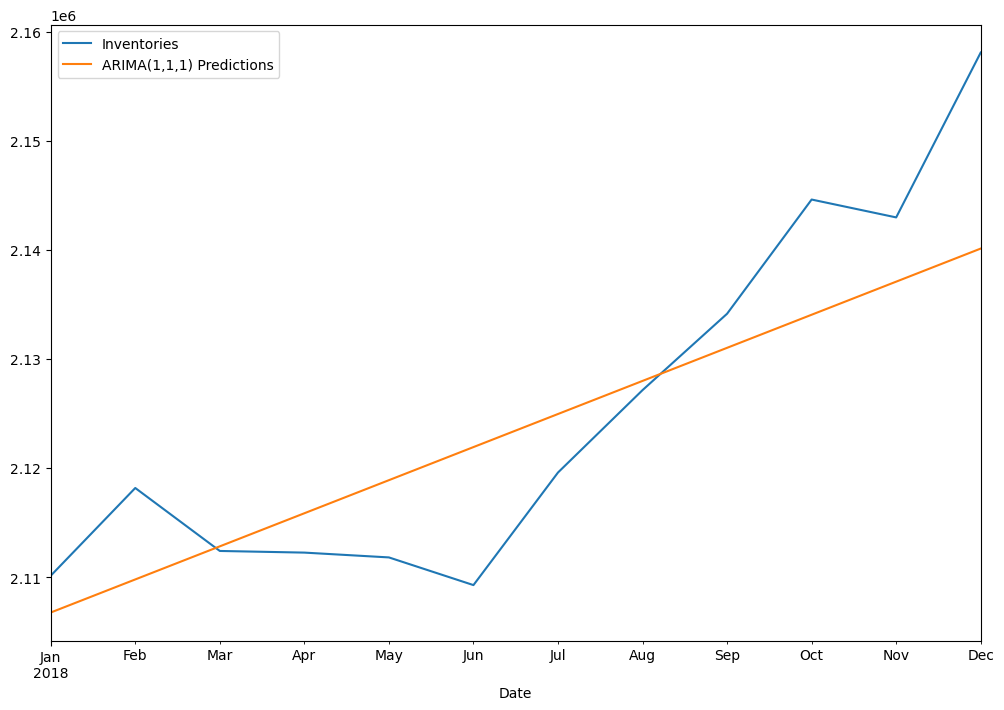

In [39]:
# plot predictions vs actual
test['Inventories'].plot(figsize=(12,8), legend=True)
predcitions.plot(legend=True)
plt.show()

## Evaluate the Model

In [40]:
from statsmodels.tools.eval_measures import rmse

In [41]:
error = rmse(test['Inventories'], predcitions)
error

np.float64(8232.63035050288)

Compare the error value to the average value of the test set to see how far off we are 

In [42]:
test['Inventories'].mean()

np.float64(2125075.6666666665)

Scale of the errors is very small compared to order of the mean values in the dataset

In [43]:
# predictions mean
predcitions.mean()

np.float64(2123464.713570435)

Predictions mean is pretty close to the actual test mean

## Forecast into the Unknown Future
Should not predict longer than the length of the TEST dataset (NOT length of train dataset)

In [44]:
# retrain the model on the full Inventories data set
model = SARIMAX(df2['Inventories'], order=(1,1,1))
results = model.fit()

In [45]:
# make future 11 months forecast - note we should not forecast more than the length of the test dataset
fcast = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename("ARIMA(1,1,1) Forecast") #type ='levels' to get the actual forecast values not the differenced values

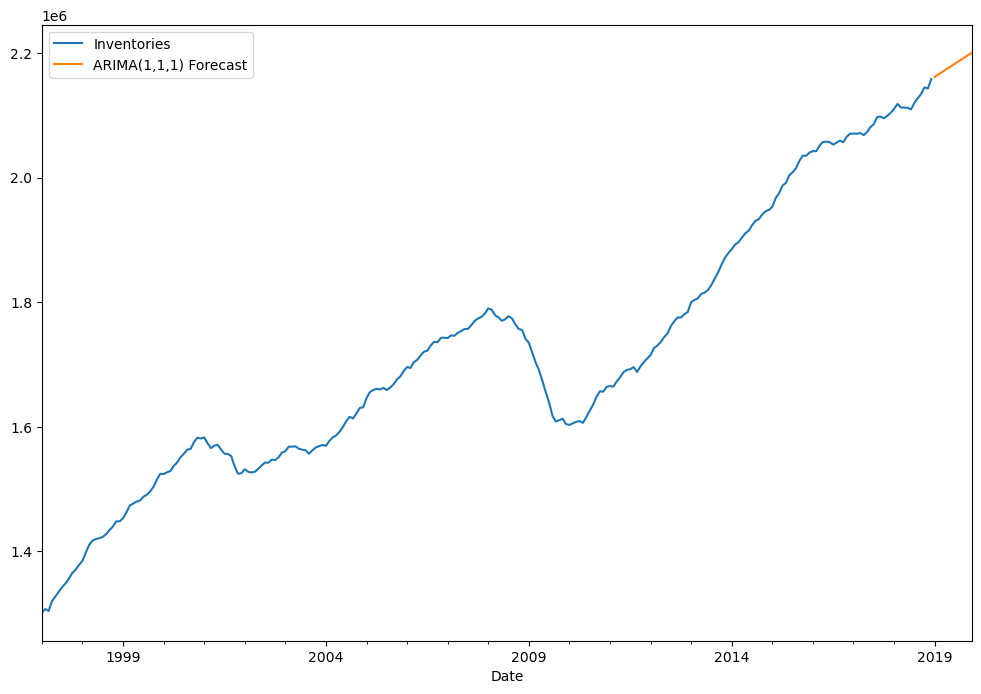

In [46]:
# plot the forecast
df2['Inventories'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)
plt.show()